![photo](https://moneytrumpet.co.uk/wp-content/uploads/2020/03/loan-decision-970x675.jpg)

# **Loan Decision project**

## import libraries




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn import metrics

## import dataset

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/hasanj0n/Datasets/main/loan_approval_dataset.csv", index_col=0)

In [ ]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,,,,,,,,,,,,
1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## general information about dataset

In [ ]:
# information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4269 entries, 1 to 4269
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 433.6+ KB


In [ ]:
# number of null values
df.isnull().sum()

 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [ ]:
# Number of duplicated rows
df.duplicated().sum()

0

## preprocessing

***To create a model, we change the category columns to numeric columns***

In [ ]:
df.head(1)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,,,,,,,,,,,,
1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved


In [ ]:
df.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [ ]:
# removing unnecessary spaces in dataframe column names
df.columns = df.columns.str.lstrip()

In [ ]:
df.education.values

array([' Graduate', ' Not Graduate', ' Graduate', ..., ' Not Graduate',
       ' Not Graduate', ' Graduate'], dtype=object)

In [ ]:
# education column -> numeric column
dct = {" Graduate":1, " Not Graduate":0} # Graduate=1, Not Graduate=0
df.education= df.education.map(dct)

In [ ]:
df.self_employed.values

array([' No', ' Yes', ' No', ..., ' No', ' No', ' No'], dtype=object)

In [ ]:
# self_employed column -> numeric column
dct = {" Yes":1, " No":0} # No=0, Yes=1
df.self_employed= df.self_employed.map(dct)

In [ ]:
df.loan_status.values

array([' Approved', ' Rejected', ' Rejected', ..., ' Rejected',
       ' Approved', ' Approved'], dtype=object)

In [ ]:
# loan_status column -> numeric column
dct = {" Approved":1, " Rejected":0} # Rejected=0, Approved=1
df.loan_status= df.loan_status.map(dct)

In [ ]:
df.head(3)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,,,,,,,,,,,,
1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0


In [ ]:
# Statistic informations
df.describe()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269.000000
mean,2.498712,0.502225,0.503631,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,0.622160
std,1.695910,0.500054,0.500045,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,0.484904
min,0.000000,0.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,0.000000
25%,1.000000,0.000000,0.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,0.000000
50%,3.000000,1.000000,1.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,1.000000
75%,4.000000,1.000000,1.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,1.000000
max,5.000000,1.000000,1.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07,1.000000


### Visualization

In [ ]:
correlation = df.corr()
correlation

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
no_of_dependents,1.000000,0.002697,0.000765,0.007266,-0.003366,-0.020111,-0.009998,0.007376,-0.001531,0.002817,0.011163,-0.018114
education,0.002697,1.000000,-0.023224,0.011625,0.010631,-0.008417,-0.004649,0.010930,-0.006763,0.012471,0.009424,0.004918
self_employed,0.000765,-0.023224,1.000000,0.002368,0.001450,0.004107,-0.004866,0.006144,-0.017998,0.004413,-0.000215,0.000345
income_annum,0.007266,0.011625,0.002368,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093,-0.015189
loan_amount,-0.003366,0.010631,0.001450,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122,0.016150
loan_term,-0.020111,-0.008417,0.004107,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177,-0.113036
cibil_score,-0.009998,-0.004649,-0.004866,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478,0.770518
residential_assets_value,0.007376,0.010930,0.006144,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418,-0.014367
commercial_assets_value,-0.001531,-0.006763,-0.017998,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576,0.008246
luxury_assets_value,0.002817,0.012471,0.004413,0.929145,0.860914,0.012490,-0.028618,0.590932,0.591128,1.000000,0.788517,-0.015465


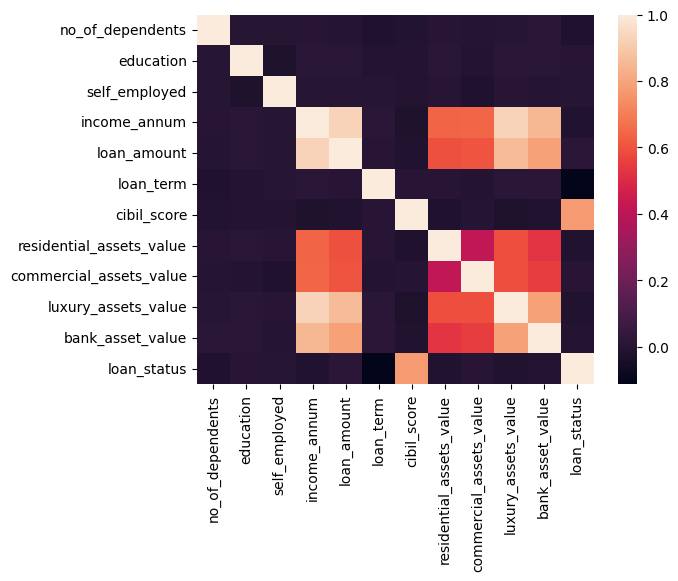

In [ ]:
# df correlation in heatmap
sns.heatmap(correlation)
plt.show()

In [ ]:
df.corrwith(df.loan_status).sort_values(ascending=False)

loan_status                 1.000000
cibil_score                 0.770518
loan_amount                 0.016150
commercial_assets_value     0.008246
education                   0.004918
self_employed               0.000345
bank_asset_value           -0.006778
residential_assets_value   -0.014367
income_annum               -0.015189
luxury_assets_value        -0.015465
no_of_dependents           -0.018114
loan_term                  -0.113036
dtype: float64

***One of the most important columns we have is the cibil_score column.***

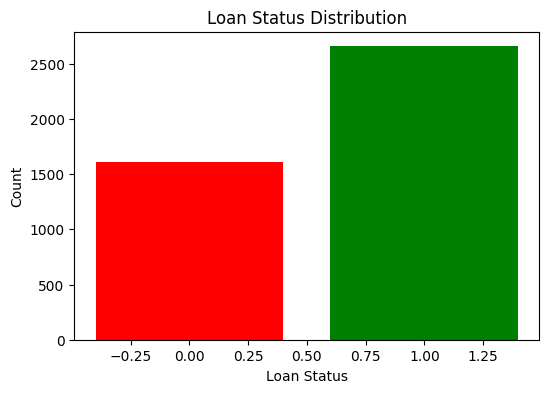

In [ ]:
#Drawn the whole status of dataset
loan_status_counts = df['loan_status'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(loan_status_counts.index, loan_status_counts.values, color=['green', 'red'])
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

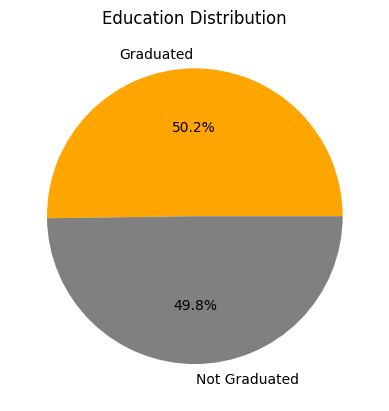

In [ ]:
#Drawing the educational status
education_counts = df['education'].value_counts()
plt.pie(education_counts, labels=["Graduated", "Not Graduated"], autopct='%1.1f%%', colors=['orange', 'gray'])
plt.title('Education Distribution')
plt.show()

<Figure size 800x600 with 0 Axes>

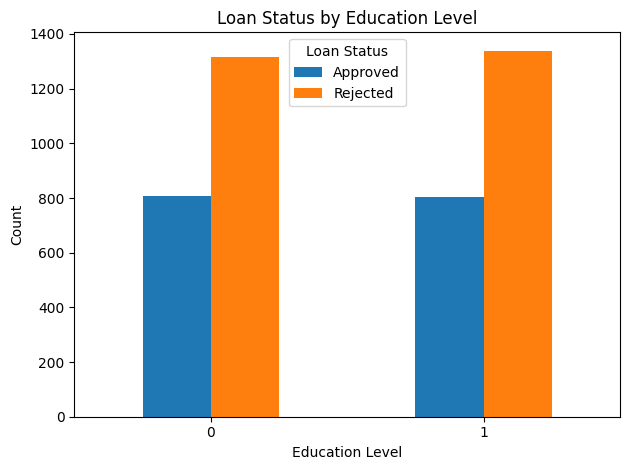

In [ ]:
#drawing the loan approval status with respect to education


education_loan_status_counts = df.groupby(['education', 'loan_status']).size().unstack()

plt.figure(figsize=(8, 6))
education_loan_status_counts.plot(kind='bar')
plt.title('Loan Status by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper center', labels=['Approved', 'Rejected'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

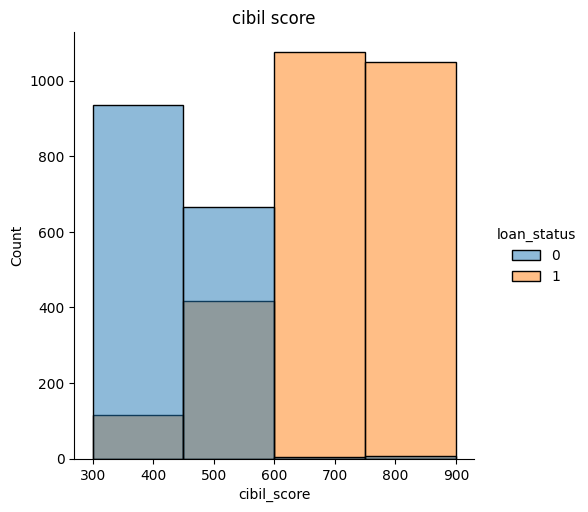

In [ ]:
#Drawing how cibil_score effect the status
sns.displot(df,x='cibil_score',bins=4,hue='loan_status')
plt.title('cibil score')
plt.show()

In [ ]:
X = df.drop("loan_status", axis=1)
X

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
loan_id,,,,,,,,,,,
1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...,...,...
4265,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000
4266,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4267,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000


In [ ]:
target = df[["loan_status"]]
target

,loan_status
loan_id,
1,1
2,0
3,0
4,0
5,0
...,...
4265,0
4266,1
4267,0


In [ ]:
train_X, test_X, train_target, test_target = train_test_split(X, target, test_size=0.2, random_state=42)

## Model

### LogisticRegression

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.67      0.01      0.01       318
           1       0.63      1.00      0.77       536

    accuracy                           0.63       854
   macro avg       0.65      0.50      0.39       854
weighted avg       0.64      0.63      0.49       854

Model Accuracy: 0.6288056206088993


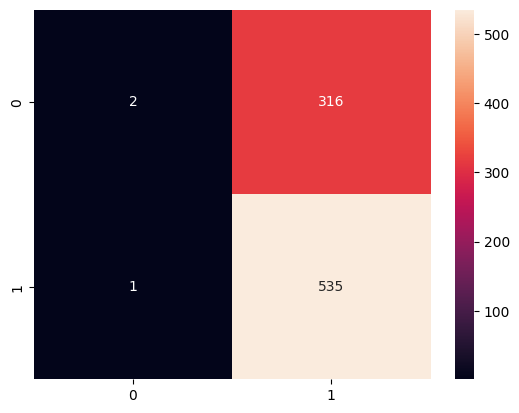

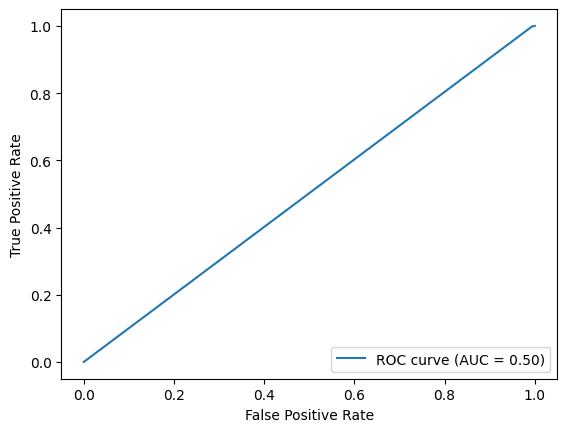

In [ ]:
# Model training
LR_model = LogisticRegression()
LR_model.fit(train_X, train_target)

# Model evaluation
y_pred = LR_model.predict(test_X)
print(metrics.classification_report(test_target, y_pred))
print("Model Accuracy:", metrics.accuracy_score(test_target, y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(test_target, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(test_target, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

### RandomForest

<ipython-input-52-adad553b3b44>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(train_X, train_target)


              precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.98      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

Model Accuracy: 0.9789227166276346


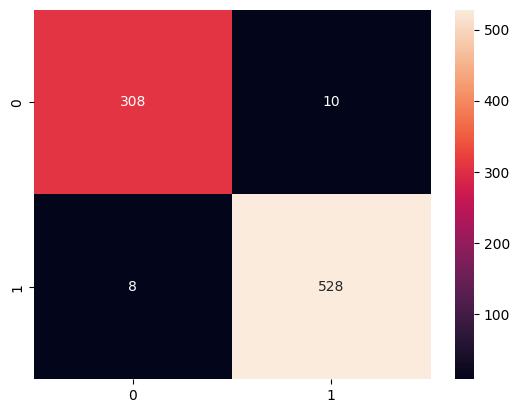

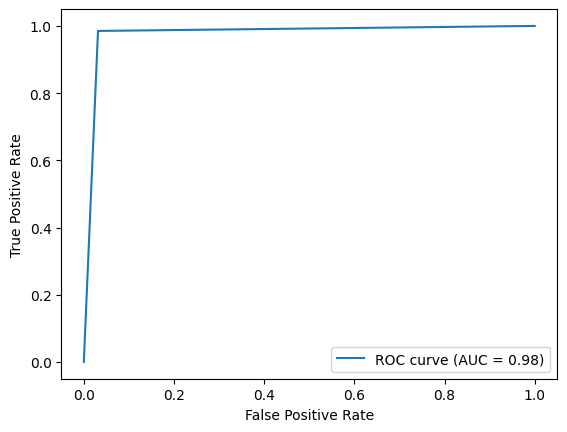

In [ ]:
# Model training
RF_model = RandomForestClassifier()
RF_model.fit(train_X, train_target)

# Model evaluation
y_pred = RF_model.predict(test_X)
print(metrics.classification_report(test_target, y_pred))
print("Model Accuracy:", metrics.accuracy_score(test_target, y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(test_target, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(test_target, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

### XGBClassifier

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       318
           1       0.98      0.99      0.99       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

Model Accuracy: 0.9824355971896955


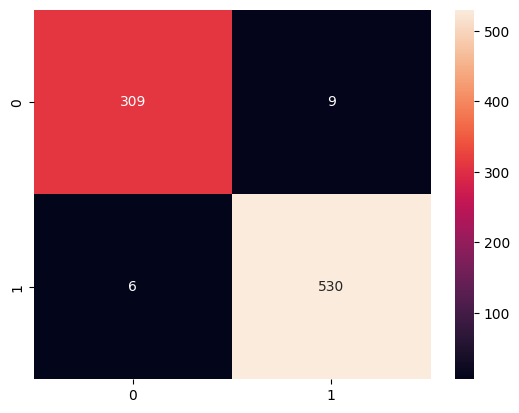

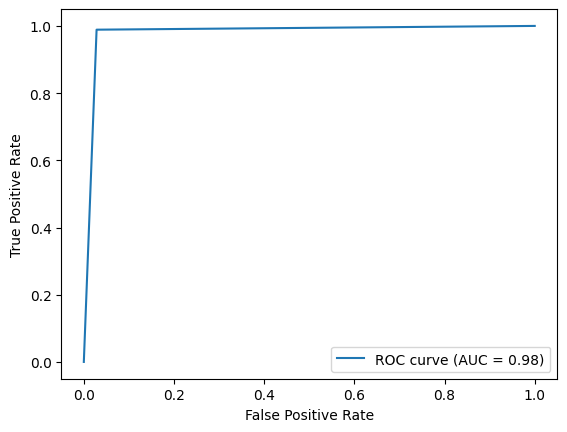

In [ ]:
# Model training
XGB_model = XGBClassifier()
XGB_model.fit(train_X, train_target)

# Model evaluation
y_pred = XGB_model.predict(test_X)
print(metrics.classification_report(test_target, y_pred))
print("Model Accuracy:", metrics.accuracy_score(test_target, y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(test_target, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(test_target, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

### DecisionTreeClassifier

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.98      0.98      0.98       536

    accuracy                           0.98       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854

Model Accuracy: 0.9754098360655737


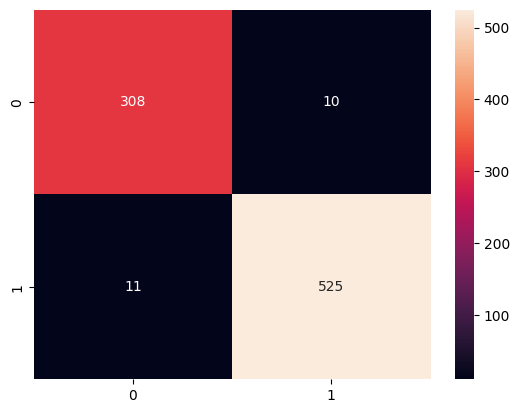

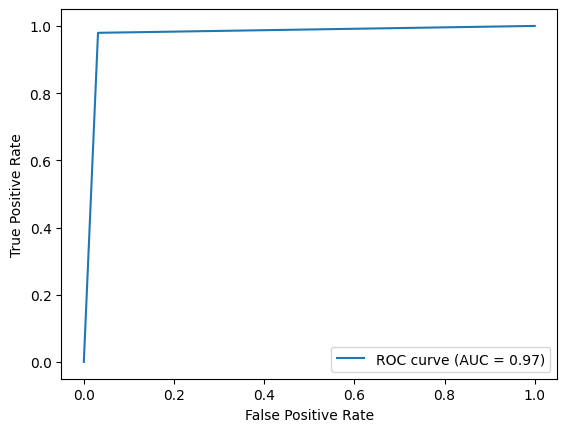

In [ ]:
# Model training
tree_model = DecisionTreeClassifier()
tree_model.fit(train_X, train_target)

# Model evaluation
y_pred = tree_model.predict(test_X)
print(metrics.classification_report(test_target, y_pred))
print("Model Accuracy:", metrics.accuracy_score(test_target, y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(test_target, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(test_target, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_predict
predict = cross_val_score(estimator=XGB_model, X=X, y=target, cv=10)
predict

array([0.97892272, 0.98594848, 0.98126464, 0.99297424, 0.98360656,
       0.98594848, 0.99063232, 0.98360656, 0.98594848, 0.99530516])

**The best model is XGBClassifier**

## Save model

In [ ]:
import joblib
filename = "model.jbl"
joblib.dump(XGB_model, filename)


['model.jbl']

In [ ]:
model = joblib.load("/content/model.jbl")

In [ ]:
data = {
    'no_of_dependents': [2],
    'education': [1],
    'self_employed': [0],
    'income_annum': [9600000],
    'loan_amount': [29900000],
    'loan_term': [12],
    'cibil_score': [778],
    'residential_assets_value': [2400000],
    'commercial_assets_value': [17600000],
    'luxury_assets_value': [22700000],
    'bank_asset_value': [8000000]
}

index = [1]  # Assuming loan_id is set as the index and the loan_id for this row is 1

lst = pd.DataFrame(data, index=index)

In [ ]:
model.predict(lst)

array([1])